In [1]:
import os
import numpy as np
import xarray as xr  
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import urllib3
import warnings
import geopandas as gpd
from sensor_network_utils import * 

urllib3.disable_warnings()
warnings.simplefilter("ignore", category=RuntimeWarning)

In [2]:
# Load GLOFAS data
glofas_data = xr.open_dataset('data/data_global_2023.grib', engine='cfgrib')

# Reassign longitude coordinates to [-180, 180]
glofas_data = glofas_data.assign_coords(
    longitude=(((glofas_data.longitude + 180) % 360) - 180)
).rio.write_crs("EPSG:4326", inplace=True)

# Load boundary shapefiles
boundaries = {
    "Bangladesh": {
        "boundary": gpd.read_file('data/gadm41_BGD_shp/gadm41_BGD_0.shp'),
        "extent": [87, 93, 20, 28]  # [min_lon, max_lon, min_lat, max_lat]
    },
    "Brazil": {
        "boundary": gpd.read_file('data/gadm41_BRA_shp/gadm41_BRA_0.shp'),
        "extent": [-75, -34, -34, 5]  # [min_lon, max_lon, min_lat, max_lat]
    }
}

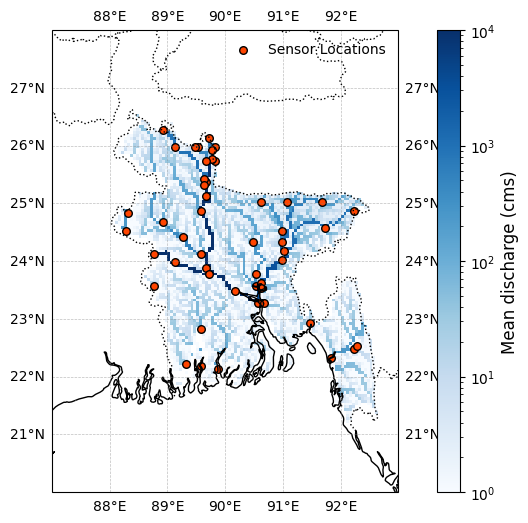

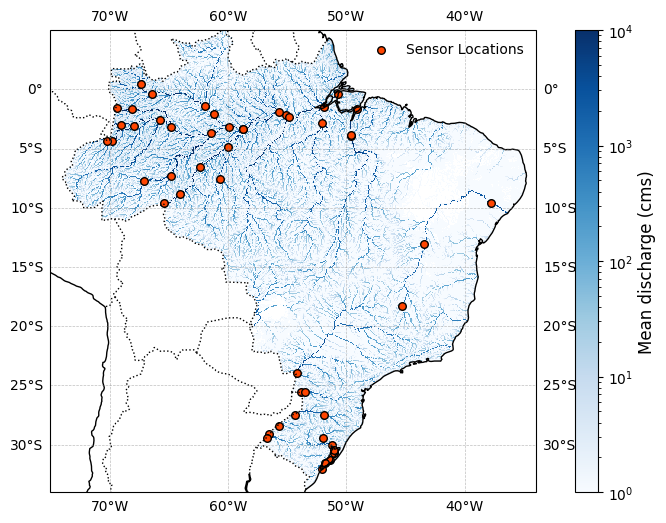

In [3]:
# Process regions and plot
for region_name, region_data in boundaries.items():
    boundary = region_data["boundary"]
    extent = region_data["extent"]
    
    mean_data, selected_points = process_region(
        glofas_data, boundary, extent, sensor_number=50
    )
    
    plot_map_glofas(
        mean_data, selected_points, region_name, cbar_label="Mean discharge (cms)"
    )